In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


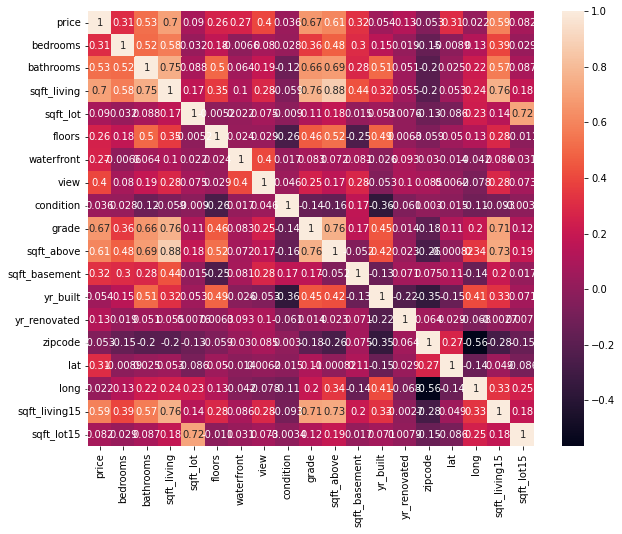

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.drop(columns=['id','date']).corr(),annot=True)

In [ ]:
X = data.drop(columns=['id','date','price'])
y = data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regresi Linear tanpa Polynomial features

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled,y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

==================== TRAIN ====================
MAE: 125033.16493803883
MSE: 39311882352.23275
RMSE: 198272.24302012814
MAPE: 0.25540501442853675
R2 Score: 0.6991021854487472
==================== TEST ====================
MAE: 127493.34208656968
MSE: 45173046132.790146
RMSE: 212539.51663817753
MAPE: 0.2495432401651723
R2 Score: 0.7011904448878412


### Dengan Polynomial Features

In [ ]:
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression(fit_intercept=True)
model.fit(X_train_poly,y_train)

y_pred_train = model.predict(X_train_poly)
y_pred = model.predict(X_test_poly)

print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

==================== TRAIN ====================
MAE: 96989.46721732215
MSE: 21684405110.193886
RMSE: 147256.25660797535
MAPE: 0.20070022450309052
R2 Score: 0.8340249889578035
==================== TEST ====================
MAE: 104214.74927712236
MSE: 30429945493.1719
RMSE: 174441.81119551556
MAPE: 0.205426089853476
R2 Score: 0.7987127445828432


### Model Linear dengan Regularisasi L1 (Lasso)

In [ ]:
model = Lasso(alpha=0.1,fit_intercept=True)
model.fit(X_train_scaled,y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

==================== TRAIN ====================
MAE: 125033.15869131534
MSE: 39311882352.65646
RMSE: 198272.24302119666
MAPE: 0.25540493611340104
R2 Score: 0.6991021854455041
==================== TEST ====================
MAE: 127493.34127389433
MSE: 45173050018.28453
RMSE: 212539.52577881727
MAPE: 0.24954317140281138
R2 Score: 0.7011904191861685


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.059e+13, tolerance: 2.259e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


### Model Linear dengan Ridge (L2)

In [ ]:
model = Ridge(alpha=0.1,fit_intercept=True)
model.fit(X_train_scaled,y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

==================== TRAIN ====================
MAE: 125032.94760557872
MSE: 39311882354.39527
RMSE: 198272.24302558156
MAPE: 0.2554042590948226
R2 Score: 0.699102185432195
==================== TEST ====================
MAE: 127493.14790834174
MSE: 45173072024.31945
RMSE: 212539.57754808737
MAPE: 0.2495425805791764
R2 Score: 0.7011902736211897


# Model Linear dengan ElasticNet

In [ ]:
model = ElasticNet(alpha=0.1,l1_ratio=0.5, fit_intercept=True)
model.fit(X_train_scaled,y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

==================== TRAIN ====================
MAE: 123618.58546009967
MSE: 39438373818.36828
RMSE: 198590.97114010062
MAPE: 0.2502445550611277
R2 Score: 0.6981340047501345
==================== TEST ====================
MAE: 126285.80701429067
MSE: 45513632130.62795
RMSE: 213339.24189100316
MAPE: 0.24509570009256895
R2 Score: 0.698937545001653


### Ridge + Poly features

In [ ]:
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = Ridge(alpha=0.5,fit_intercept=True)
model.fit(X_train_poly,y_train)

y_pred_train = model.predict(X_train_poly)
y_pred = model.predict(X_test_poly)

print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y_train,y_pred_train))
print('MSE:',mean_squared_error(y_train,y_pred_train))
print('RMSE:',mean_squared_error(y_train,y_pred_train,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_pred_train))
print('R2 Score:',r2_score(y_train,y_pred_train))

print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',mean_squared_error(y_test,y_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

==================== TRAIN ====================
MAE: 96998.27855361506
MSE: 21688780861.119595
RMSE: 147271.11346465605
MAPE: 0.20073800426435962
R2 Score: 0.8339914964407379
==================== TEST ====================
MAE: 104203.31454514236
MSE: 30445054110.93324
RMSE: 174485.11143055512
MAPE: 0.20533091567144104
R2 Score: 0.7986128044694767


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X=data.drop(columns=['id','date','waterfront'])
y=data['waterfront']

In [ ]:
y.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(penalty='l2',solver='newton-cg', C=0.1, fit_intercept=True)

model.fit(X_train_scaled,y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print('Train Accuracy:', accuracy_score(y_train,y_pred_train))
print('Test Accuracy:', accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9956622325043377
Test Accuracy: 0.9944482997918113


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: waterfront, Length: 21613, dtype: int64